In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd

In [0]:
df = pd.read_csv('./drive/My Drive/다핏문제/906/dataset_37_diabetes.csv')

In [5]:
df

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,tested_negative
764,2,122,70,27,0,36.8,0.340,27,tested_negative
765,5,121,72,23,112,26.2,0.245,30,tested_negative
766,1,126,60,0,0,30.1,0.349,47,tested_positive


In [6]:
df.columns

Index(['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age', 'class'], dtype='object')

In [0]:
preg = df['preg']
plas = df['plas']
pres = df['pres']
skin = df['skin']
insu = df['insu']
mass = df['mass']
pedi = df['pedi']
age = df['age']
dfclass = df['class']

In [8]:
df.corr()

,preg,plas,pres,skin,insu,mass,pedi,age
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
insu,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

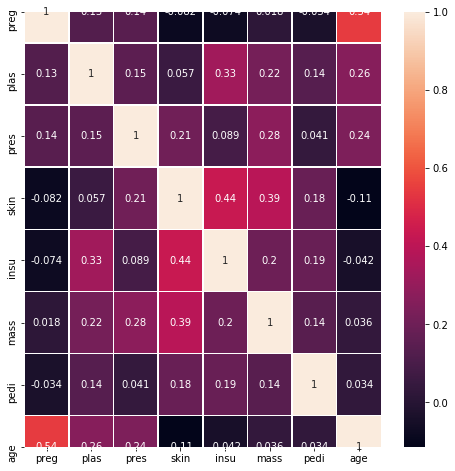

In [10]:
plt.figure(figsize=(8,8))
sns.heatmap(data=df.corr(),annot=True, linewidths=.5)  # 상관계수 : 기본이 피어슨 상관계수 사용

In [0]:
# 0이 아닌 혈압있는 데이터
predf = df.replace({'pres':'0'},{'pres':None})
predf = predf.dropna()

train_x = predf.loc[:,['age','preg','plas','mass','skin']].values
train_y = predf.loc[:,['pres']].values

presdf = df[df.pres==0]
presdf = presdf.loc[:,['age','preg','plas','mass','skin']].values


In [0]:
import tensorflow as tf

In [0]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(32, kernel_initializer='normal', activation = "relu"), 
                                    tf.keras.layers.Dense(256, kernel_initializer='normal', activation = "relu"),
                                    tf.keras.layers.Dense(512, kernel_initializer='normal', activation = "relu"),
                                    tf.keras.layers.Dense(512, kernel_initializer='normal', activation = "relu"),
                                    tf.keras.layers.Dense(512, kernel_initializer='normal', activation = "relu"),
                                    tf.keras.layers.Dense(128, kernel_initializer='normal', activation = "relu"),
                                    tf.keras.layers.Dense(64, kernel_initializer='normal', activation = "relu"),
                                    tf.keras.layers.Dropout(rate=0.5),
                                    tf.keras.layers.Dense(1, kernel_initializer='normal', activation = "relu")
])

model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['MeanSquaredError'])

In [0]:
model.fit(train_x, train_y, epochs=100, batch_size=32, validation_split=0.2)

Train on 614 samples, validate on 154 samples
Epoch 1/100
614/614 [==============================] - 0s 478us/sample - loss: 619.1658 - mean_squared_error: 619.1658 - val_loss: 525.0142 - val_mean_squared_error: 525.0142
Epoch 2/100
614/614 [==============================] - 0s 478us/sample - loss: 556.2768 - mean_squared_error: 556.2768 - val_loss: 459.6088 - val_mean_squared_error: 459.6088
Epoch 3/100
614/614 [==============================] - 0s 474us/sample - loss: 584.2552 - mean_squared_error: 584.2554 - val_loss: 297.0381 - val_mean_squared_error: 297.0381
Epoch 4/100
614/614 [==============================] - 0s 490us/sample - loss: 547.9374 - mean_squared_error: 547.9373 - val_loss: 337.3135 - val_mean_squared_error: 337.3135
Epoch 5/100
614/614 [==============================] - 0s 476us/sample - loss: 572.5388 - mean_squared_error: 572.5388 - val_loss: 300.2204 - val_mean_squared_error: 300.2205
Epoch 6/100
614/614 [==============================] - 0s 483us/sample - loss: 

In [0]:
prediction =  model.predict(presdf)

In [0]:
prediction

array([[69.1482  ],
       [69.33313 ],
       [43.33805 ],
       [20.848377],
       [62.64642 ],
       [28.328955],
       [69.36137 ],
       [80.68375 ],
       [71.288055],
       [62.384956],
       [56.364616],
       [58.177616],
       [56.1738  ],
       [67.196304],
       [74.109665],
       [60.566837],
       [79.584564],
       [11.296009],
       [60.072517],
       [62.098408],
       [32.007565],
       [72.73431 ],
       [63.93352 ],
       [33.75489 ],
       [45.440144],
       [68.82103 ],
       [66.324905],
       [60.60523 ],
       [65.793594],
       [63.90022 ],
       [56.849865],
       [69.07086 ],
       [55.347088],
       [78.31221 ],
       [39.83765 ]], dtype=float32)

In [0]:
import numpy as np

In [0]:
train_x = np.array(train_x)

In [0]:
train_x = train_x.transpose()
#train_y = np.array(train_y)
#train_y = train_y.transpose()

In [0]:
prediction = np.array(prediction)
prediction = prediction.transpose()

In [0]:
prediction.size

35

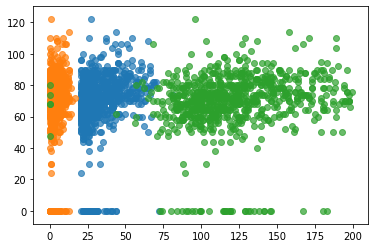

In [0]:
plt.scatter(train_x[0], train_y,alpha=0.7, label='age')
plt.scatter(train_x[1], train_y,alpha=0.7, label='preg')
plt.scatter(train_x[2], train_y,alpha=0.7, label='plag')